In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [3]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [4]:
print(fruits.shape)

(59, 7)


### Statistical Summary

In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

### Fruit type distribution

In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


The data is pretty balanced except mandarin. We will just have to go with it.

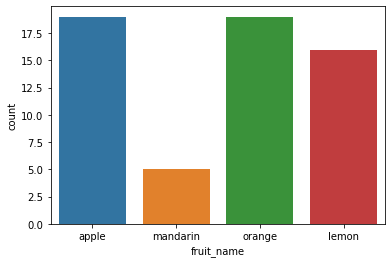

In [7]:
import seaborn as sns
sns.countplot(data=fruits,x='fruit_name',label="Count")
plt.show()

The data is pretty balanced except mandarin. We will just have to go with it. 

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

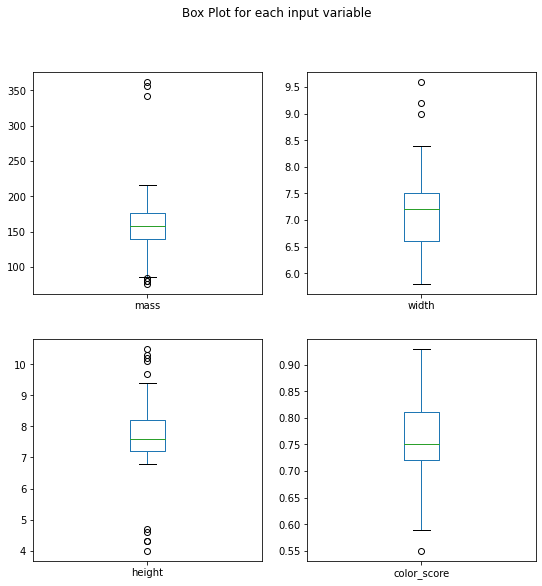

In [8]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

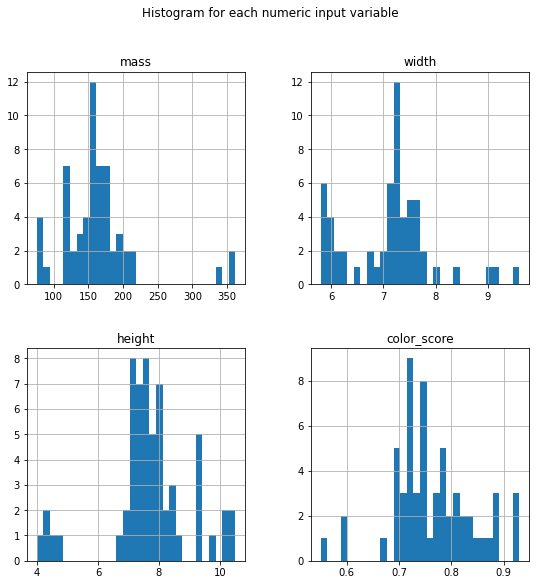

In [9]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

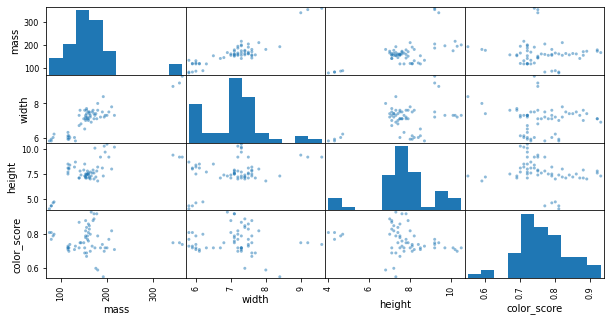

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
print(X)
print(y)

    mass  width  height  color_score
0    192    8.4     7.3         0.55
1    180    8.0     6.8         0.59
2    176    7.4     7.2         0.60
3     86    6.2     4.7         0.80
4     84    6.0     4.6         0.79
5     80    5.8     4.3         0.77
6     80    5.9     4.3         0.81
7     76    5.8     4.0         0.81
8    178    7.1     7.8         0.92
9    172    7.4     7.0         0.89
10   166    6.9     7.3         0.93
11   172    7.1     7.6         0.92
12   154    7.0     7.1         0.88
13   164    7.3     7.7         0.70
14   152    7.6     7.3         0.69
15   156    7.7     7.1         0.69
16   156    7.6     7.5         0.67
17   168    7.5     7.6         0.73
18   162    7.5     7.1         0.83
19   162    7.4     7.2         0.85
20   160    7.5     7.5         0.86
21   156    7.4     7.4         0.84
22   140    7.3     7.1         0.87
23   170    7.6     7.9         0.88
24   342    9.0     9.4         0.75
25   356    9.2     9.2         0.75
2

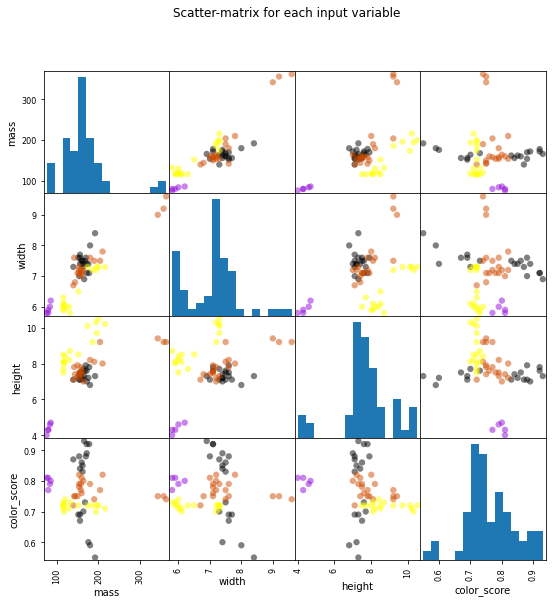

In [12]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

### Create training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train, X_test, y_train, y_test)

    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80
49   132    5.8     8.7         0.73
29   160    7.0     7.4         0.81
37   154    7.3     7.3         0.79
56   116    5.9     8.1         0.73
18   162    7.5     7.1         0.83
55   116    6.3     7.7         0.72
27   204    7.5     9.2         0.77
15   156    7.7     7.1         0.69
5     80    5.8     4.3         0.77
31   210    7.8     8.0         0.82
16   156    7.6     7.5         0.67
50   130    6.0     8.2         0.71
20   160    7.5     7.5         0.86
51   116    6.0     7.5         0.72
8    178    7.1     7.8         0.92
13   164    7.3     7.7         0.70
25   356    9.2     9.2         0.75
17   168    7.5     7.6         0.73
58   118    6.1     8.1         0.70
57   152    6.5     8.5         0.72
52   118    5.9     8.0         0.72
3

### Apply scalling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.         

## Build Models

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


#### Setting max decision tree depth to help avoid overfitting

In [17]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.60


### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Linear Discriminant Analysis

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


### Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of one error made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (However, the test set was small).

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Plot the decision boundary of the k-nn classifier

In [23]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

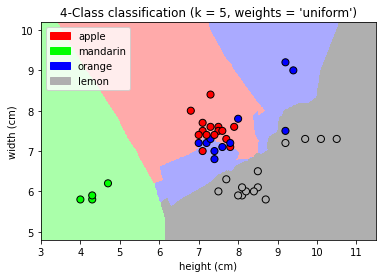

In [24]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

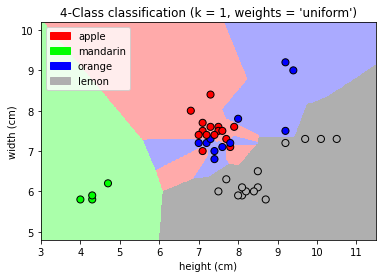

In [25]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

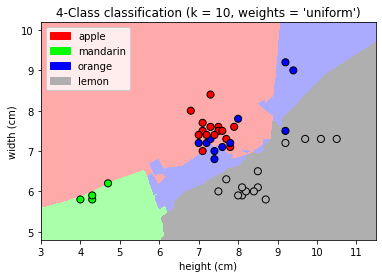

In [26]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

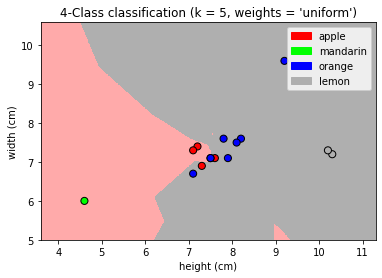

In [27]:
plot_fruit_knn(X_test, y_test, 5, 'uniform')

[0.6, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.26666666666666666, 0.3333333333333333, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666]


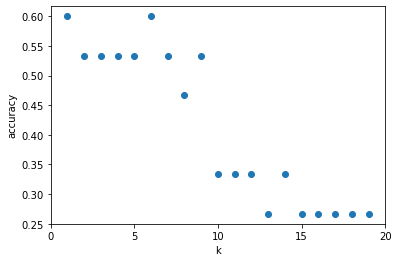

In [28]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
print(scores)

For this particular dateset, we obtain the highest accuracy when k=6.